In [21]:
# Importing the libraries
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler


In [22]:
# Reading the data
dataset = pd.read_csv("Dataset\china.arff.csv")
x = np.array(dataset.drop(['Effort'],axis=1))
y = np.array(dataset['Effort'])

In [23]:
dataset.head()

,Input,Output,Enquiry,File,Interface,Duration,Effort
0,774,260,340,128,0,4.0,7490
1,9,4,3,193,41,17.0,4150
2,25,33,28,42,35,9.0,668
3,151,28,8,39,0,4.0,3238
4,93,0,194,20,0,13.0,2994


In [24]:
y.shape

(499,)

In [25]:
scaler=MinMaxScaler(feature_range=(0,1))
x=scaler.fit_transform(x)
y=np.reshape(y,(499,1))
y=scaler.fit_transform(y)

In [26]:
X_train , X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=35) 

In [27]:
from sklearn.tree import DecisionTreeRegressor

regr = DecisionTreeRegressor()
regr.fit(X_train,y_train.ravel())
y_pred=regr.predict(X_test)
 

In [28]:
y.shape

(499, 1)

In [29]:
y_pred=np.reshape(y_pred,(100,1))
y_test=np.reshape(y_test,(100,1))

In [30]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [31]:
# y_pred

In [32]:
# y_test

In [33]:
def calculate_smape(actual, predicted) -> float:
  
    # Convert actual and predicted to numpy
    # array data type if not already
    if not all([isinstance(actual, np.ndarray), 
                isinstance(predicted, np.ndarray)]):
        actual, predicted = np.array(actual),
        np.array(predicted)
  
    return round(
        np.mean(
            np.abs(predicted - actual) / 
            ((np.abs(predicted) + np.abs(actual))/2)
        )*100, 2
    )

In [34]:
# RMSE (Root Mean Square Error)
mse=mean_squared_error(y_test, y_pred)
print("\nMSE:\n",mse)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("\nRMSE:\n",rmse)
mape=mape(y_test, y_pred)
print("\nMAPE:\n",mape)

smape = calculate_smape(y_test, y_pred)
print("\nSMAPE:\n",smape)
r2_score=1 - (1-regr.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("\n Adj R2 score:\n",r2_score)


MSE:
 0.007562388256430259

RMSE:
 0.0869619931719039

MAPE:
 130.7781463325355

SMAPE:
 85.52

 Adj R2 score:
 1.0


In [35]:
y_pred=scaler.inverse_transform(y_pred)
y_test=scaler.inverse_transform(y_test)

In [36]:
y_test=np.reshape(y_test,(100,))
y_pred=np.reshape(y_pred,(100,))

In [37]:
dfr=pd.DataFrame({'Actual Effort':y_test, 'Predicted effort':y_pred})
print(dfr)

    Actual Effort  Predicted effort
0          1362.0              26.0
1           871.0             500.0
2          2387.0             667.0
3           564.0             408.0
4          1607.0             148.0
..            ...               ...
95         4867.0            3189.0
96         1584.0            3585.0
97        26408.0           32760.0
98          976.0             526.0
99         2450.0             937.0

[100 rows x 2 columns]


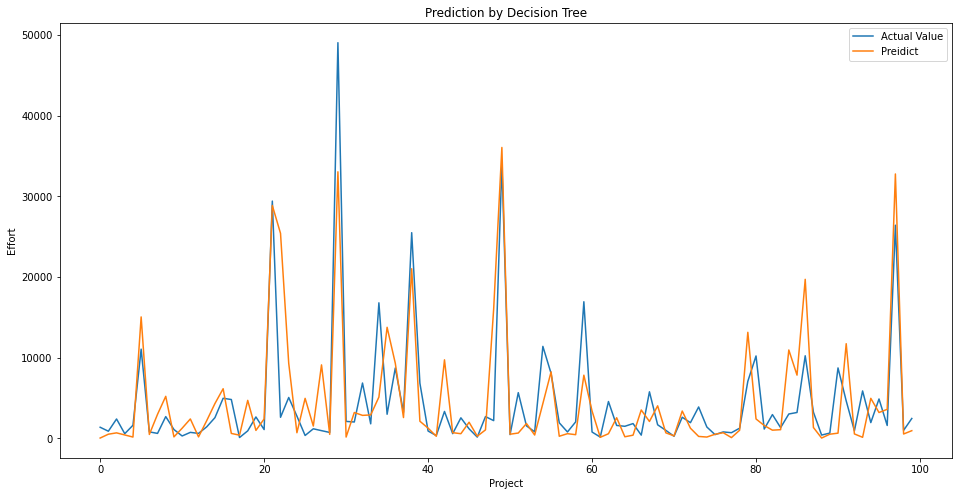

In [39]:
#Predicted vs Actual Close Value 
from matplotlib import pyplot as plt 
plt.figure(figsize=(16,8))
plt.plot(y_test, label="Actual Value")
plt.plot(y_pred, label="Preidict")
plt.title("Prediction by Decision Tree")
plt.xlabel("Project")
plt.ylabel("Effort")
plt.legend()
plt.show()